# THE EFFECT OF LOCAL VENUES IN SPREADING CORONAVIRUS : A Comparison Between New York & London

Hi dear friends! As you all know, there is a pleague that puts the entire world into troublesome times called "coronavirus", in other words COVID-19. After the outbreak, US turned to be one of the most affected countries, sadly. In the scope of this specialized course series provided by IBM on coursera, we learned many things to help us with data analysis. I wanted to use that knowledge to make comments on something up-to-date. I had to choose US because this was the only detailed dataset I could find online in a short notice. I will list out the datasets I used and the sources of them below. Hope I will be successful in my journey, and make meaningful inferences.

**_Stay home, stay safe!_**

## Getting Datasets Ready - New York

In [1]:
# download required packages

#!conda install beautifulsoup4
#!conda install lxml
#!conda install requests
#!conda install -c conda-forge folium=0.5.0 --yes 
#!conda install seaborn

print("Downloaded!")

Downloaded!


In [2]:
# required libraries to read a file that is in Watson Studio assets

import pandas as pd
import numpy as np
import matplotlib
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from bs4 import BeautifulSoup
import requests
import re

In [3]:
ny_df = pd.read_excel(r'C:\Users\Semanur\Desktop\usdata.xlsx')
ny_df.head()

,Neighborhood,Population,Latitude,Longitude,cases
0,Albany,307463,42.6526,-73.7562,2792
1,Allegany,73549,39.6255,-78.6115,80
2,Broome,198093,42.1792,-75.8534,335
3,Cattaraugus,78962,42.3292,-78.8681,40
4,Cayuga,79173,42.9190,-76.7263,35


In [4]:
print(ny_df.columns)
print(ny_df.dtypes)
ny_df.describe()

Index(['Neighborhood', 'Population', 'Latitude', 'Longitude', 'cases'], dtype='object')
Neighborhood     object
Population        int64
Latitude        float64
Longitude       float64
cases             int64
dtype: object


,Population,Latitude,Longitude,cases
count,5.700000e+01,57.000000,57.000000,57.000000
mean,2.245278e+05,42.447361,-75.532777,5608.403509
std,4.541461e+05,0.911117,1.743888,19083.955749
min,3.520000e+03,39.625500,-79.466800,4.000000
25%,3.004600e+04,42.008400,-76.623800,70.000000
50%,7.588000e+04,42.601200,-75.165200,148.000000
75%,2.237740e+05,43.025600,-73.962600,1021.000000
max,3.116069e+06,44.447300,-72.615100,102386.000000


In [5]:
x=len(ny_df['Neighborhood'].unique())
print("There exists {} boroughs in New york".format(x))   

There exists 57 boroughs in New york


Let's examine the relationship between the population and number of cases

In [6]:
ny_df[["Population","cases"]].corr()

,Population,cases
Population,1.000000,0.301913
cases,0.301913,1.000000


By looking at the correlation coefficient, population and number of cases are not correlated. We can see its's examples in also real life.

In [7]:
# Let's plot it in the graph

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0, 6362684.296612848)

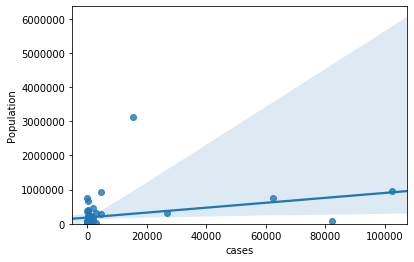

In [8]:
sns.regplot(x="cases", y="Population", data=ny_df)
plt.ylim(0,)

In [9]:
# insert histogram

## Clustering for New York

In [10]:
# dropping object columns to make the dataset ready for clustering
ny_kmeans=ny_df[:]
ny_kmeans.drop(columns=['Latitude','Longitude','Neighborhood'], inplace=True) 
ny_kmeans.head()

C:\Users\Semanur\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Population,cases
0,307463,2792
1,73549,80
2,198093,335
3,78962,40
4,79173,35


In [11]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [12]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_kmeans)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10]) 

# add clustering labels
ny_df.insert(0, 'Cluster Labels', kmeans.labels_)
ny_df.head()

[3 0 3 0 0 0 0 0 0 0]


,Cluster Labels,Neighborhood,Population,Latitude,Longitude,cases
0,3,Albany,307463,42.6526,-73.7562,2792
1,0,Allegany,73549,39.6255,-78.6115,80
2,3,Broome,198093,42.1792,-75.8534,335
3,0,Cattaraugus,78962,42.3292,-78.8681,40
4,0,Cayuga,79173,42.9190,-76.7263,35


In [13]:
# silhouette methof to get the best k 
ny_df.head()

,Cluster Labels,Neighborhood,Population,Latitude,Longitude,cases
0,3,Albany,307463,42.6526,-73.7562,2792
1,0,Allegany,73549,39.6255,-78.6115,80
2,3,Broome,198093,42.1792,-75.8534,335
3,0,Cattaraugus,78962,42.3292,-78.8681,40
4,0,Cayuga,79173,42.9190,-76.7263,35


In [14]:
# Let's visualize

latitude=40.7128   #latitude and longitue values for New York
longitude=-74.0060

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_df['Latitude'], ny_df['Longitude'], ny_df['Neighborhood'], ny_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's see the neighborhoods in each cluster

In [15]:
ny_cl_0 =ny_df.loc[ny_df['Cluster Labels'] == 0]
ny_cl_0.drop(columns=['Latitude','Longitude'], inplace=True)
ny_cl_0

C:\Users\Semanur\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cluster Labels,Neighborhood,Population,cases
1,0,Allegany,73549,80
3,0,Cattaraugus,78962,40
4,0,Cayuga,79173,35
5,0,Chautauqua,3520,54
6,0,Chemung,88267,148
7,0,Chenango,49549,166
8,0,Clinton,37929,197
9,0,Columbia,24327,304
10,0,Cortland,49043,70
11,0,Delaware,117335,148


In [16]:
ny_cl_1=ny_df.loc[ny_df['Cluster Labels'] == 1]
ny_cl_1.drop(columns=['Latitude','Longitude'], inplace=True)
ny_cl_1

,Cluster Labels,Neighborhood,Population,cases
32,1,Orange,3116069,15349


In [17]:
ny_cl_2=ny_df.loc[ny_df['Cluster Labels'] == 2]
ny_cl_2.drop(columns=['Latitude','Longitude'], inplace=True)
ny_cl_2

,Cluster Labels,Neighborhood,Population,cases
13,2,Erie,921584,4547
14,2,Essex,763849,62
21,2,Jefferson,659026,95
46,2,Suffolk,758919,62543
54,2,Westchester,967315,102386


In [18]:
ny_cl_3=ny_df.loc[ny_df['Cluster Labels'] == 3]
ny_cl_3.drop(columns=['Latitude','Longitude'], inplace=True)
ny_cl_3

,Cluster Labels,Neighborhood,Population,cases
0,3,Albany,307463,2792
2,3,Broome,198093,335
12,3,Dutchess,296928,4532
17,3,Genesee,415874,99
24,3,Madison,346438,382
26,3,Montgomery,228138,80
28,3,Niagara,214150,465
30,3,Onondaga,468304,1942
33,3,Orleans,376738,43
38,3,Rockland,320688,26828


## Getting Datasets Ready - London

Let's do the same analysis for London too. 

In [19]:
lon_df = pd.read_excel(r'C:\Users\Semanur\Desktop\ukdata.xlsx')
lon_df.head()

,Neighborhood,Population,Latitude,Longitude,Total Cases
0,Barking and Dagenham,211.998,51.5607,0.1557,209
1,Barnet,392.140,51.6252,-0.1517,645
2,Bexley,247.258,51.4549,0.1505,242
3,Brent,330.795,51.5588,-0.2817,728
4,Bromley,331.096,51.4039,0.0198,489


In [20]:
# London data descriptive analysis
print(lon_df.columns)
print(lon_df.dtypes)
lon_df.describe()

Index(['Neighborhood', 'Population', 'Latitude', 'Longitude', 'Total Cases'], dtype='object')
Neighborhood     object
Population      float64
Latitude        float64
Longitude       float64
Total Cases       int64
dtype: object


,Population,Latitude,Longitude,Total Cases
count,32.000000,32.000000,32.000000,32.000000
mean,277.503188,51.505666,-0.119197,363.531250
std,61.422621,0.072662,0.161904,163.914018
min,156.197000,51.361800,-0.476000,0.000000
25%,245.229000,51.456250,-0.205325,251.000000
50%,278.182500,51.505600,-0.114100,320.500000
75%,326.056250,51.558850,-0.011525,489.000000
max,392.140000,51.653800,0.183700,728.000000


In [21]:
x=len(lon_df['Neighborhood'].unique())
print("There exists {} boroughs in London".format(x))   

There exists 32 boroughs in London


In [22]:
lon_df[["Population","Total Cases"]].corr()

,Population,Total Cases
Population,1.000000,0.708661
Total Cases,0.708661,1.000000


(0, 455.45981944906265)

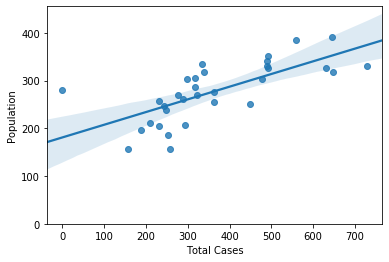

In [23]:
#Let's plot the graph

sns.regplot(x="Total Cases", y="Population", data=lon_df)
plt.ylim(0,)

## Clustering for London

In [24]:
# dropping object columns to make the dataset ready for clustering
lon_kmeans=lon_df[:]
lon_kmeans.drop(columns=['Latitude','Longitude','Neighborhood'], inplace=True) 
lon_kmeans.head()

,Population,Total Cases
0,211.998,209
1,392.140,645
2,247.258,242
3,330.795,728
4,331.096,489


In [25]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lon_kmeans)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10]) 

# add clustering labels
lon_df.insert(0, 'Cluster Labels', kmeans.labels_)
lon_df.head()

[1 2 1 2 3 0 3 3 0 0]


,Cluster Labels,Neighborhood,Population,Latitude,Longitude,Total Cases
0,1,Barking and Dagenham,211.998,51.5607,0.1557,209
1,2,Barnet,392.140,51.6252,-0.1517,645
2,1,Bexley,247.258,51.4549,0.1505,242
3,2,Brent,330.795,51.5588,-0.2817,728
4,3,Bromley,331.096,51.4039,0.0198,489


In [26]:
# Let's visualize

latitude=51.5074   #latitude and longitue values for New York
longitude=-0.1278
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lon_df['Latitude'], lon_df['Longitude'], lon_df['Neighborhood'], lon_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [27]:
# let's see the neighborhoods in each cluster

lon_cl_0= lon_df.loc[lon_df['Cluster Labels'] == 0]
lon_cl_0.drop(columns=['Latitude','Longitude'], inplace=True)
lon_cl_0

C:\Users\Semanur\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cluster Labels,Neighborhood,Population,Total Cases
5,0,Camden,262.226,289
8,0,Enfield,333.869,333
9,0,Greenwich,286.186,318
12,0,Haringey,270.624,277
15,0,Hillingdon,304.824,317
16,0,Hounslow,270.782,323
22,0,Merton,206.186,293
24,0,Redbridge,303.858,299
28,0,Tower Hamlets,317.705,339
29,0,Waltham Forest,276.700,364


In [28]:
lon_cl_1=lon_df.loc[lon_df['Cluster Labels'] == 1]
lon_cl_1.drop(columns=['Latitude','Longitude'], inplace=True)
lon_cl_1

,Cluster Labels,Neighborhood,Population,Total Cases
0,1,Barking and Dagenham,211.998,209
2,1,Bexley,247.258,242
10,1,Hackney,279.665,0
11,1,Hammersmith and Fulham,185.426,252
14,1,Havering,257.810,232
17,1,Islington,239.142,248
18,1,Kensington and Chelsea,156.197,258
19,1,Kingston upon Thames,156.197,156
25,1,Richmond upon Thames,196.904,189
27,1,Sutton,204.525,232


In [29]:
lon_cl_2=lon_df.loc[lon_df['Cluster Labels'] == 2]
lon_cl_2.drop(columns=['Latitude','Longitude'], inplace=True)
lon_cl_2

,Cluster Labels,Neighborhood,Population,Total Cases
1,2,Barnet,392.140,645
3,2,Brent,330.795,728
20,2,Lambeth,325.917,631
26,2,Southwark,317.256,648


In [30]:
lon_cl_3=lon_df.loc[lon_df['Cluster Labels'] == 3]
lon_cl_3.drop(columns=['Latitude','Longitude'], inplace=True)
lon_cl_3

,Cluster Labels,Neighborhood,Population,Total Cases
4,3,Bromley,331.096,489
6,3,Croydon,385.346,558
7,3,Ealing,341.982,489
13,3,Harrow,250.149,450
21,3,Lewisham,303.536,477
23,3,Newham,352.005,493
30,3,Wandsworth,326.474,492


# Venue Type Evaluation

## New York

In [31]:
CLIENT_ID = '1DFALF2T3LISBTCHBTQJXRUEXYSPVR0DEUFHQ35XCTVPV0LF' # your Foursquare ID
CLIENT_SECRET = 'VGDXYNJXG2UGAIZPS0WSAMRSJTHFC0HE20VCJIT3LVGOB0S1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius=500
LIMIT=500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1DFALF2T3LISBTCHBTQJXRUEXYSPVR0DEUFHQ35XCTVPV0LF
CLIENT_SECRET:VGDXYNJXG2UGAIZPS0WSAMRSJTHFC0HE20VCJIT3LVGOB0S1


In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
#calling all venues in new york neighborhoods

ny_venues = getNearbyVenues(names=ny_df['Neighborhood'],
                                   latitudes=ny_df['Latitude'],
                                   longitudes=ny_df['Longitude']
                                  )
print(ny_venues.shape)
ny_venues.head()

Albany
Allegany
Broome
Cattaraugus
Cayuga
Chautauqua
Chemung
Chenango
Clinton
Columbia
Cortland
Delaware
Dutchess
Erie
Essex
Franklin
Fulton
Genesee
Greene
Hamilton
Herkimer
Jefferson
Lewis
Livingston
Madison
Monroe
Montgomery
Nassau
Niagara
Oneida
Onondaga
Ontario
Orange
Orleans
Oswego
Otsego
Putnam
Rensselaer
Rockland
Saratoga
Schenectady
Schoharie
Schuyler
Seneca
St. Lawrence
Steuben
Suffolk
Sullivan
Tioga
Tompkins
Ulster
Warren
Washington
Wayne
Westchester
Wyoming
Yates
(514, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany,42.6526,-73.7562,Renaissance Albany Hotel,42.650625,-73.755687,Hotel
1,Albany,42.6526,-73.7562,Public House 42,42.650171,-73.756492,English Restaurant
2,Albany,42.6526,-73.7562,The Egg,42.650593,-73.758390,Performing Arts Venue
3,Albany,42.6526,-73.7562,City Beer Hall,42.649660,-73.754787,Pub
4,Albany,42.6526,-73.7562,Food Trucks,42.651410,-73.756563,Food Truck


In [35]:
# expanding the columns
ny_venues_exp = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_venues_exp['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_venues_exp.columns[-1]] + list(ny_venues_exp.columns[:-1])
ny_venues_exp = ny_venues_exp[fixed_columns]

ny_venues_exp.head()

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Theater,Tree,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albany,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albany,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albany,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albany,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
ny_grouped = ny_venues_exp.groupby('Neighborhood').mean().reset_index()
ny_grouped.head()

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Theater,Tree,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Albany,0.022222,0.0,0.044444,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.022222,0.0,0.0,0.0,0.0,0.022222,0.0,0.0,0.0,0.0
1,Broome,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Cattaraugus,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Cayuga,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Chautauqua,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.076923,0.0,...,0.076923,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ny_venues_sorted = pd.DataFrame(columns=columns)
ny_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    ny_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

ny_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Albany,Café,Coffee Shop,Park
1,Broome,Gym,Donut Shop,Dessert Shop
2,Cattaraugus,Café,Yoga Studio,Dessert Shop
3,Cayuga,Soccer Field,Park,Dessert Shop
4,Chautauqua,Café,Bike Rental / Bike Share,Theater


In [39]:
ny_result_0 = pd.merge(ny_cl_0, ny_venues_sorted, on='Neighborhood')
ny_result_0
ny_result_0.to_excel(r'C:\Users\Semanur\Desktop\nycl0.xlsx', index = False)

In [40]:
ny_result_1 = pd.merge(ny_cl_1, ny_venues_sorted, on='Neighborhood')
ny_result_1

,Cluster Labels,Neighborhood,Population,cases,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,1,Orange,3116069,15349,Deli / Bodega,Yoga Studio,Dessert Shop


In [41]:
ny_result_2 = pd.merge(ny_cl_2, ny_venues_sorted, on='Neighborhood')
ny_result_2

,Cluster Labels,Neighborhood,Population,cases,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,2,Erie,921584,4547,Coffee Shop,Pub,Wings Joint
1,2,Essex,763849,62,Boat or Ferry,Antique Shop,Ice Cream Shop
2,2,Jefferson,659026,95,Breakfast Spot,Tree,Yoga Studio
3,2,Suffolk,758919,62543,Beach,Food & Drink Shop,Yoga Studio


In [42]:
ny_result_3 = pd.merge(ny_cl_3, ny_venues_sorted, on='Neighborhood')
ny_result_3

,Cluster Labels,Neighborhood,Population,cases,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,3,Albany,307463,2792,Café,Coffee Shop,Park
1,3,Broome,198093,335,Gym,Donut Shop,Dessert Shop
2,3,Dutchess,296928,4532,Gym,Diner,Hotel
3,3,Madison,346438,382,Bed & Breakfast,Music Venue,Business Service
4,3,Montgomery,228138,80,American Restaurant,Deli / Bodega,Bakery
5,3,Niagara,214150,465,Park,Auto Garage,Convenience Store
6,3,Rockland,320688,26828,Bowling Alley,Convenience Store,Chinese Restaurant
7,3,Saratoga,223774,1293,Music Venue,Burrito Place,Yoga Studio
8,3,Ulster,181300,1887,Furniture / Home Store,Cosmetics Shop,Frozen Yogurt Shop


## London

In [43]:
#calling all venues in london neighborhoods

lon_venues = getNearbyVenues(names=lon_df['Neighborhood'],
                                   latitudes=lon_df['Latitude'],
                                   longitudes=lon_df['Longitude']
                                  )
print(lon_venues.shape)
lon_venues.head()

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster
(1468, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [44]:
# expanding the columns
lon_venues_exp = pd.get_dummies(lon_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lon_venues_exp['Neighborhood'] = lon_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lon_venues_exp.columns[-1]] + list(lon_venues_exp.columns[:-1])
lon_venues_exp = lon_venues_exp[fixed_columns]

lon_venues_exp.head()

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
lon_grouped = lon_venues_exp.groupby('Neighborhood').mean().reset_index()
lon_grouped

,Neighborhood,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Barnet,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Bexley,0.00000,0.000000,0.000000,0.000000,0.033333,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.00,0.000000,0.000000
3,Brent,0.00000,0.000000,0.000000,0.000000,0.025974,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,Bromley,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Camden,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.012346,0.000000,...,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Croydon,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Ealing,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.013514,0.000000,...,0.000000,0.000000,0.013514,0.027027,0.000000,0.013514,0.000000,0.00,0.000000,0.000000
8,Enfield,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.00,0.017857,0.000000
9,Greenwich,0.02439,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.024390,0.024390,0.000000,0.000000,0.00,0.000000,0.000000


In [46]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lon_venues_sorted = pd.DataFrame(columns=columns)
lon_venues_sorted['Neighborhood'] = lon_grouped['Neighborhood']

for ind in np.arange(lon_grouped.shape[0]):
    lon_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lon_grouped.iloc[ind, :], num_top_venues)

lon_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Barking and Dagenham,Martial Arts Dojo,Pool,Bus Station
1,Barnet,Café,Bus Stop,Yoga Studio
2,Bexley,Clothing Store,Coffee Shop,Pub
3,Brent,Clothing Store,Hotel,Coffee Shop
4,Bromley,Clothing Store,Coffee Shop,Pizza Place


In [47]:
lon_result_0 = pd.merge(lon_cl_0, lon_venues_sorted, on='Neighborhood')
lon_result_0

,Cluster Labels,Neighborhood,Population,Total Cases,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,0,Camden,262.226,289,Hotel,Pub,Coffee Shop
1,0,Enfield,333.869,333,Clothing Store,Coffee Shop,Optical Shop
2,0,Greenwich,286.186,318,Clothing Store,Fast Food Restaurant,Supermarket
3,0,Haringey,270.624,277,Fast Food Restaurant,Pub,Park
4,0,Hillingdon,304.824,317,Coffee Shop,Italian Restaurant,Clothing Store
5,0,Hounslow,270.782,323,Café,Bed & Breakfast,Chinese Restaurant
6,0,Merton,206.186,293,Pizza Place,Café,Supermarket
7,0,Redbridge,303.858,299,Clothing Store,Fast Food Restaurant,Coffee Shop
8,0,Tower Hamlets,317.705,339,Italian Restaurant,Gym / Fitness Center,Hotel
9,0,Waltham Forest,276.700,364,Pub,Coffee Shop,Gym / Fitness Center


In [48]:
lon_result_1 = pd.merge(lon_cl_1, lon_venues_sorted, on='Neighborhood')
lon_result_1

,Cluster Labels,Neighborhood,Population,Total Cases,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,1,Barking and Dagenham,211.998,209,Martial Arts Dojo,Pool,Bus Station
1,1,Bexley,247.258,242,Clothing Store,Coffee Shop,Pub
2,1,Hackney,279.665,0,Pub,Café,Coffee Shop
3,1,Hammersmith and Fulham,185.426,252,Pub,Café,Indian Restaurant
4,1,Havering,257.810,232,Clothing Store,Coffee Shop,Hotel
5,1,Islington,239.142,248,Pub,Bakery,Ice Cream Shop
6,1,Kensington and Chelsea,156.197,258,Café,Hotel,Juice Bar
7,1,Kingston upon Thames,156.197,156,Coffee Shop,Café,Clothing Store
8,1,Richmond upon Thames,196.904,189,Pub,Coffee Shop,Italian Restaurant
9,1,Sutton,204.525,232,Clothing Store,Pub,Coffee Shop


In [49]:
lon_result_2 = pd.merge(lon_cl_2, lon_venues_sorted, on='Neighborhood')
lon_result_2

,Cluster Labels,Neighborhood,Population,Total Cases,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,2,Barnet,392.140,645,Café,Bus Stop,Yoga Studio
1,2,Brent,330.795,728,Clothing Store,Hotel,Coffee Shop
2,2,Lambeth,325.917,631,Caribbean Restaurant,Pub,Mexican Restaurant
3,2,Southwark,317.256,648,Coffee Shop,Pub,Bar


In [50]:
lon_result_3 = pd.merge(lon_cl_3, lon_venues_sorted, on='Neighborhood')
lon_result_3

,Cluster Labels,Neighborhood,Population,Total Cases,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,3,Bromley,331.096,489,Clothing Store,Coffee Shop,Pizza Place
1,3,Croydon,385.346,558,Pub,Coffee Shop,Asian Restaurant
2,3,Ealing,341.982,489,Coffee Shop,Pub,Clothing Store
3,3,Harrow,250.149,450,Indie Movie Theater,Indian Restaurant,Coffee Shop
4,3,Lewisham,303.536,477,Grocery Store,Supermarket,Italian Restaurant
5,3,Newham,352.005,493,Hotel,Airport Service,Airport
6,3,Wandsworth,326.474,492,Coffee Shop,Clothing Store,Pub
